# <center><b> `HCHO Gas Forcasting model - ARIMA`</b></center>

### `Importing libraries`


In [210]:
import pandas as pd


### `Load the datasets`

In [211]:
df_col_mat_nuw = pd.read_csv('Data Sets\col_mat_nuw_output.csv')
df_kan = pd.read_csv('Data Sets\kan_output.csv')
df_mon_kur_jaf = pd.read_csv('Data Sets\mon_kur_jaf_output.csv')

In [212]:
# Adding Column names
columns = ['HCHO Value','Location','Date','Next Date']
df_col_mat_nuw.columns = columns
df_kan.columns = columns
df_mon_kur_jaf.columns = columns

In [213]:
print(df_col_mat_nuw.head())
print(df_kan.head())
print(df_mon_kur_jaf.head())

   HCHO Value        Location        Date   Next Date
0    0.000263  Colombo Proper  2019-01-02  2019-01-03
1    0.000099  Colombo Proper  2019-01-03  2019-01-04
2    0.000210  Colombo Proper  2019-01-04  2019-01-05
3    0.000179  Colombo Proper  2019-01-05  2019-01-06
4    0.000108  Colombo Proper  2019-01-06  2019-01-07
   HCHO Value      Location        Date   Next Date
0    0.000092  Kandy Proper  2019-01-02  2019-01-03
1         NaN  Kandy Proper  2019-01-03  2019-01-04
2    0.000191  Kandy Proper  2019-01-04  2019-01-05
3    0.000122  Kandy Proper  2019-01-05  2019-01-06
4   -0.000065  Kandy Proper  2019-01-06  2019-01-07
   HCHO Value            Location        Date   Next Date
0    0.000019  Bibile, Monaragala  2019-01-02  2019-01-03
1    0.000028  Bibile, Monaragala  2019-01-03  2019-01-04
2    0.000037  Bibile, Monaragala  2019-01-04  2019-01-05
3   -0.000018  Bibile, Monaragala  2019-01-05  2019-01-06
4    0.000146  Bibile, Monaragala  2019-01-06  2019-01-07


In [214]:
#check the location values
print(df_col_mat_nuw['Location'].unique())
print(df_kan['Location'].unique())
print(df_mon_kur_jaf['Location'].unique())


['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper']
['Kandy Proper']
['Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


In [215]:
# check the data count for each location

location_counts = {
    'Colombo Proper': 0,
    'Deniyaya, Matara': 0,
    'Nuwara Eliya Proper': 0,
    'Kandy Proper': 0,
    'Bibile, Monaragala': 0,
    'Kurunegala Proper': 0,
    'Jaffna Proper': 0
}

for location in df_col_mat_nuw['Location']:
    if location in location_counts:
        location_counts[location] += 1
for location in df_kan['Location']:
    if location in location_counts:
        location_counts[location] += 1
for location in df_mon_kur_jaf['Location']:
    if location in location_counts:
        location_counts[location] += 1

for i in location_counts:
    print(i, location_counts[i])

Colombo Proper 1825
Deniyaya, Matara 1826
Nuwara Eliya Proper 1826
Kandy Proper 1825
Bibile, Monaragala 1825
Kurunegala Proper 1826
Jaffna Proper 1826


In [216]:
# Create separate dataframes for each location
colombo_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Colombo Proper']
Deniyaya_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Deniyaya, Matara']
Nuwara_Eliya_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Nuwara Eliya Proper']
Kandy_df = df_kan[df_kan['Location'] == 'Kandy Proper']
Bibile_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Bibile, Monaragala']
Kurunegala_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Kurunegala Proper']
Jaffna_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Jaffna Proper']

In [217]:
# check for null values
print('Colombo\n',colombo_df.isnull().sum())
print('Deniyaya\n',Deniyaya_df.isnull().sum())
print('Nuwaraeliya\n',Nuwara_Eliya_df.isnull().sum())
print('Kandy\n',Kandy_df.isnull().sum())
print('Bibile\n',Bibile_df.isnull().sum())
print('Kurunegala\n',Kurunegala_df.isnull().sum())
print('Jaffna\n',Jaffna_df.isnull().sum())

Colombo
 HCHO Value    487
Location        0
Date            0
Next Date       0
dtype: int64
Deniyaya
 HCHO Value    847
Location        0
Date            0
Next Date       0
dtype: int64
Nuwaraeliya
 HCHO Value    1085
Location         0
Date             0
Next Date        0
dtype: int64
Kandy
 HCHO Value    793
Location        0
Date            0
Next Date       0
dtype: int64
Bibile
 HCHO Value    694
Location        0
Date            0
Next Date       0
dtype: int64
Kurunegala
 HCHO Value    592
Location        0
Date            0
Next Date       0
dtype: int64
Jaffna
 HCHO Value    365
Location        0
Date            0
Next Date       0
dtype: int64


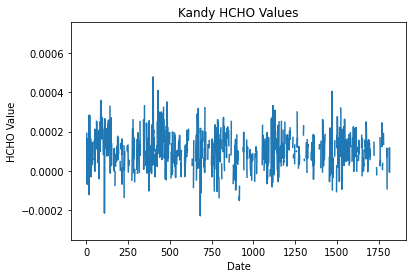

In [218]:
#plot the kandy HCHO values
import matplotlib.pyplot as plt
plt.plot(Kandy_df['HCHO Value'])
plt.xlabel('Date')
plt.ylabel('HCHO Value')
plt.title('Kandy HCHO Values')
plt.show()


In [219]:
Kandy_df.head()

,HCHO Value,Location,Date,Next Date
0,0.000092,Kandy Proper,2019-01-02,2019-01-03
1,NaN,Kandy Proper,2019-01-03,2019-01-04
2,0.000191,Kandy Proper,2019-01-04,2019-01-05
3,0.000122,Kandy Proper,2019-01-05,2019-01-06
4,-0.000065,Kandy Proper,2019-01-06,2019-01-07


In [220]:
Kandy_df['copy HCHO values'] = Kandy_df['HCHO Value']


In [221]:
Kandy_df.dtypes


HCHO Value          float64
Location             object
Date                 object
Next Date            object
copy HCHO values    float64
dtype: object

In [222]:
#droping Location, Next Date columns  for all dataframes

colombo_df = colombo_df.drop(['Location','Next Date'], axis=1)
Deniyaya_df = Deniyaya_df.drop(['Location','Next Date'], axis=1)
Nuwara_Eliya_df = Nuwara_Eliya_df.drop(['Location','Next Date'], axis=1)
Kandy_df = Kandy_df.drop(['Location','Next Date'], axis=1)
Bibile_df = Bibile_df.drop(['Location','Next Date'], axis=1)
Kurunegala_df = Kurunegala_df.drop(['Location','Next Date'], axis=1)
Jaffna_df = Jaffna_df.drop(['Location','Next Date'], axis=1)



In [223]:
# fill all HCHO values with the interpolation method

colombo_df['HCHO Value'] = colombo_df['HCHO Value'].interpolate()
Deniyaya_df['HCHO Value'] = Deniyaya_df['HCHO Value'].interpolate()
Nuwara_Eliya_df['HCHO Value'] = Nuwara_Eliya_df['HCHO Value'].interpolate()
Kandy_df['HCHO Value'] = Kandy_df['HCHO Value'].interpolate()
Bibile_df['HCHO Value'] = Bibile_df['HCHO Value'].interpolate()
Kurunegala_df['HCHO Value'] = Kurunegala_df['HCHO Value'].interpolate()
Jaffna_df['HCHO Value'] = Jaffna_df['HCHO Value'].interpolate()


In [224]:
#checking for null values
print('Colombo\n',colombo_df.isnull().sum())
print('Deniyaya\n',Deniyaya_df.isnull().sum())
print('Nuwaraeliya\n',Nuwara_Eliya_df.isnull().sum())
print('Kandy\n',Kandy_df.isnull().sum())
print('Bibile\n',Bibile_df.isnull().sum())
print('Kurunegala\n',Kurunegala_df.isnull().sum())
print('Jaffna\n',Jaffna_df.isnull().sum())


Colombo
 HCHO Value    0
Date          0
dtype: int64
Deniyaya
 HCHO Value    1
Date          0
dtype: int64
Nuwaraeliya
 HCHO Value    2
Date          0
dtype: int64
Kandy
 HCHO Value            0
Date                  0
copy HCHO values    793
dtype: int64
Bibile
 HCHO Value    0
Date          0
dtype: int64
Kurunegala
 HCHO Value    0
Date          0
dtype: int64
Jaffna
 HCHO Value    0
Date          0
dtype: int64


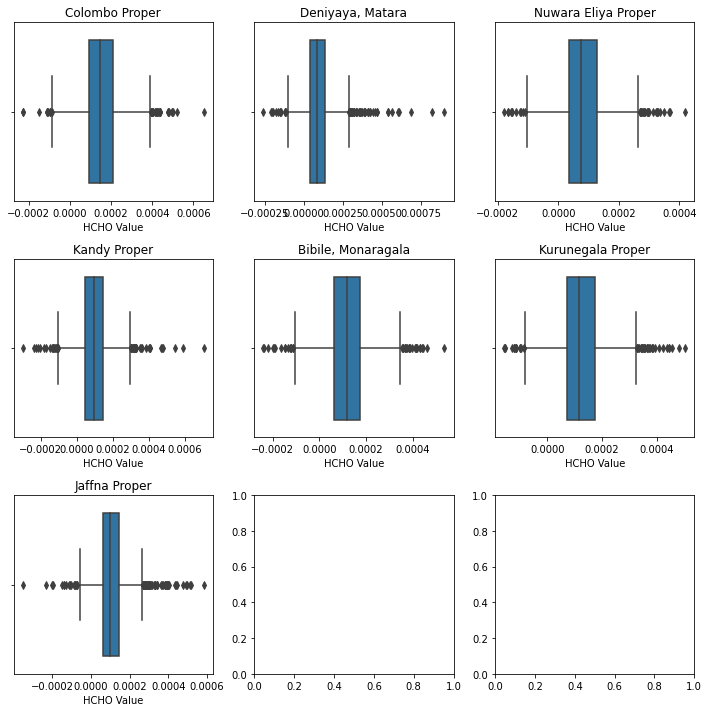

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of tuples with the dataframes and their corresponding locations
dfs_locations = [
    (colombo_df, 'Colombo Proper'),
    (Deniyaya_df, 'Deniyaya, Matara'),
    (Nuwara_Eliya_df, 'Nuwara Eliya Proper'),
    (Kandy_df, 'Kandy Proper'),
    (Bibile_df, 'Bibile, Monaragala'),
    (Kurunegala_df, 'Kurunegala Proper'),
    (Jaffna_df, 'Jaffna Proper')
]

# Set up the figure and grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()  # Flatten the axes for easier iteration

# Loop through the dataframes and locations, and create a boxplot for each
for (df, location), ax in zip(dfs_locations, axes):
    sns.boxplot(data=df, x='HCHO Value', ax=ax)
    ax.set_title(location)
    

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

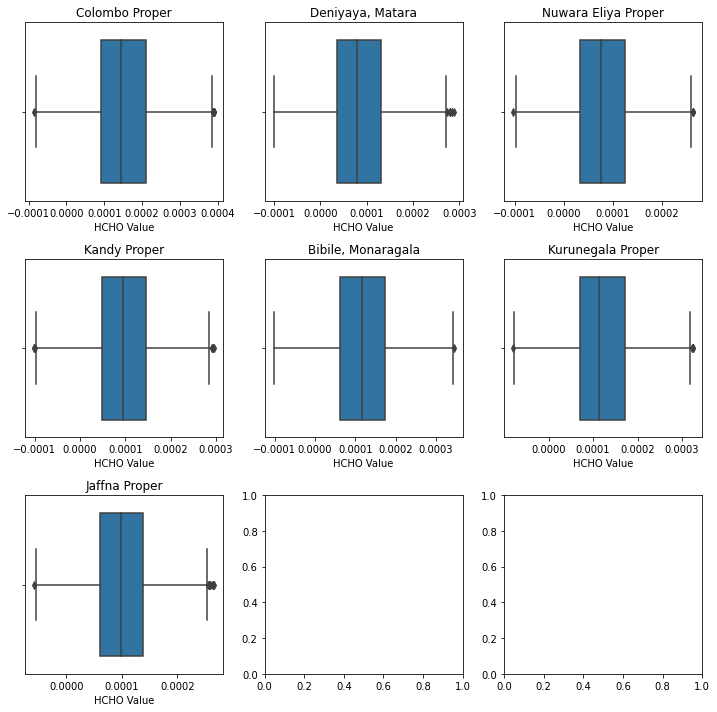

In [226]:
# remove outliers from all dataframes location wise

def remove_outliers(df):
    Q1 = df['HCHO Value'].quantile(0.25)
    Q3 = df['HCHO Value'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['HCHO Value'] >= (Q1 - 1.5 * IQR)) & (df['HCHO Value'] <= (Q3 + 1.5 * IQR))]
    return df

colombo_df = remove_outliers(colombo_df)
Deniyaya_df = remove_outliers(Deniyaya_df)
Nuwara_Eliya_df = remove_outliers(Nuwara_Eliya_df)
Kandy_df = remove_outliers(Kandy_df)
Bibile_df = remove_outliers(Bibile_df)
Kurunegala_df = remove_outliers(Kurunegala_df)
Jaffna_df = remove_outliers(Jaffna_df)

# Create a list of tuples with the dataframes and their corresponding locations
dfs_locations = [
    (colombo_df, 'Colombo Proper'),
    (Deniyaya_df, 'Deniyaya, Matara'),
    (Nuwara_Eliya_df, 'Nuwara Eliya Proper'),
    (Kandy_df, 'Kandy Proper'),
    (Bibile_df, 'Bibile, Monaragala'),
    (Kurunegala_df, 'Kurunegala Proper'),
    (Jaffna_df, 'Jaffna Proper')
]

# Set up the figure and grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()  # Flatten the axes for easier iteration

# Loop through the dataframes and locations, and create a boxplot for each
for (df, location), ax in zip(dfs_locations, axes):
    sns.boxplot(data=df, x='HCHO Value', ax=ax)
    ax.set_title(location)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


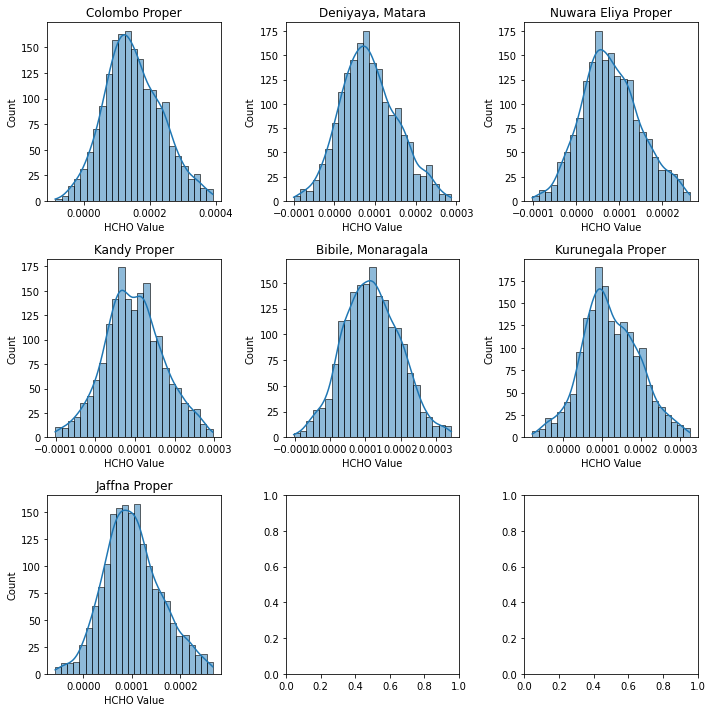

In [227]:
#plot all the locations HCHO values in a sub bar charts

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()

for (df, location), ax in zip(dfs_locations, axes):
    sns.histplot(df['HCHO Value'], ax=ax, kde=True)
    ax.set_title(location)

plt.tight_layout()
plt.show()



In [228]:
colombo_df

,HCHO Value,Date
0,0.000263,2019-01-02
1,0.000099,2019-01-03
2,0.000210,2019-01-04
3,0.000179,2019-01-05
4,0.000108,2019-01-06
...,...,...
1820,0.000118,2023-12-27
1821,0.000125,2023-12-28
1822,0.000133,2023-12-29
1823,0.000140,2023-12-30


In [229]:
Kandy_df.head()

,HCHO Value,Date,copy HCHO values
0,0.000092,2019-01-02,0.000092
1,0.000142,2019-01-03,NaN
2,0.000191,2019-01-04,0.000191
3,0.000122,2019-01-05,0.000122
4,-0.000065,2019-01-06,-0.000065


In [230]:
Kandy_df.dtypes

HCHO Value          float64
Date                 object
copy HCHO values    float64
dtype: object

In [231]:
# Using interpolation to fill the missing values
Kandy_df['copy HCHO values'] = Kandy_df['copy HCHO values'].interpolate(method='linear')

In [232]:
#check for null values
print('Kandy\n',Kandy_df.isnull().sum())

Kandy
 HCHO Value          0
Date                0
copy HCHO values    0
dtype: int64


## `Stationary Test`

In [233]:
# importing adfuller
from statsmodels.tsa.stattools import adfuller

def adfuller_test(HCHO):
    result=adfuller(HCHO)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        


In [234]:
# adf test for all data frames location wise
print('Colombo Proper')
adfuller_test(colombo_df['HCHO Value'])
print('Deniyaya, Matara')
adfuller_test(Deniyaya_df['HCHO Value'])
print('Nuwara Eliya Proper')
adfuller_test(Nuwara_Eliya_df['HCHO Value'])
print('Kandy Proper')
adfuller_test(Kandy_df['HCHO Value'])
print('Bibile, Monaragala')
adfuller_test(Bibile_df['HCHO Value'])
print('Kurunegala Proper')
adfuller_test(Kurunegala_df['HCHO Value'])
print('Jaffna Proper')
adfuller_test(Jaffna_df['HCHO Value'])


Colombo Proper
ADF Test Statistic : -4.6768939594796635
p-value : 9.297802021989602e-05
#Lags Used : 14
Number of Observations Used : 1776
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Deniyaya, Matara
ADF Test Statistic : -15.479105034434681
p-value : 2.570113148462689e-28
#Lags Used : 2
Number of Observations Used : 1760
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Nuwara Eliya Proper
ADF Test Statistic : -9.38319176690947
p-value : 6.869008945906605e-16
#Lags Used : 8
Number of Observations Used : 1780
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Kandy Proper
ADF Test Statistic : -9.164830150274673
p-value : 2.4768332405216353e-15
#Lags Used : 10
Number of Observations Used : 1765
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no uni

In [235]:
Kandy_df.isnull().sum()

HCHO Value          0
Date                0
copy HCHO values    0
dtype: int64

In [236]:
#checking the stationarity of the data
adfuller_test(Kandy_df['copy HCHO values'].dropna())

ADF Test Statistic : -9.11957439867131
p-value : 3.2325201294722e-15
#Lags Used : 10
Number of Observations Used : 1765
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## `Diffrencing`

Since the data set is not stationary have to difffrence to make it statinary

<AxesSubplot:>

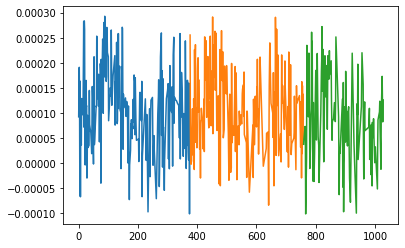

In [237]:
Kandy_df['copy HCHO values'][:365].plot()
Kandy_df['copy HCHO values'][365:730].plot()
Kandy_df['copy HCHO values'][730:995].plot()


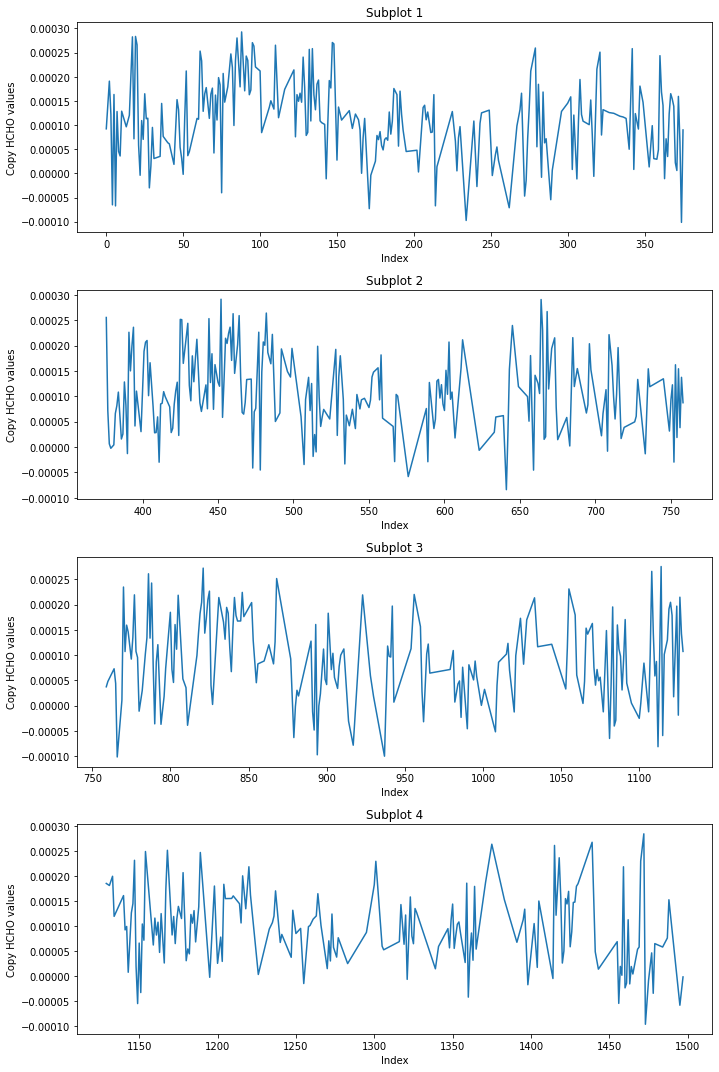

In [238]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(Kandy_df) // 365, ncols=1, figsize=(10, 15))

for i, ax in enumerate(axes):
    start_index = i * 365
    end_index = (i + 1) * 365
    data = Kandy_df['copy HCHO values'].iloc[start_index:end_index]
    ax.plot(data)
    ax.set_title(f"Subplot {i+1}")
    ax.set_xlabel("Index")
    ax.set_ylabel("Copy HCHO values")

plt.tight_layout()
plt.show()


In [239]:
#import seaborn as sns

#sns.boxplot(Kandy_df['copy HCHO values'])

In [240]:
#plot a box plot and remove outliers Kandy_df['copy HCHO values']


'''Q1 = Kandy_df['copy HCHO values'].quantile(0.25)
Q3 = Kandy_df['copy HCHO values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Kandy_df = Kandy_df[(Kandy_df['copy HCHO values'] > lower_bound) & (Kandy_df['copy HCHO values'] < upper_bound)]

sns.boxplot(Kandy_df['copy HCHO values'])
'''

"Q1 = Kandy_df['copy HCHO values'].quantile(0.25)\nQ3 = Kandy_df['copy HCHO values'].quantile(0.75)\nIQR = Q3 - Q1\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\nKandy_df = Kandy_df[(Kandy_df['copy HCHO values'] > lower_bound) & (Kandy_df['copy HCHO values'] < upper_bound)]\n\nsns.boxplot(Kandy_df['copy HCHO values'])\n"

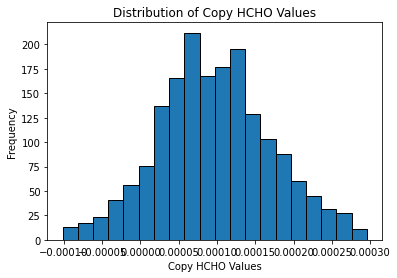

In [241]:
import matplotlib.pyplot as plt

# Assuming your copy HCHO values are stored in a variable called 'copy_hcho_values'
copy_hcho_values = Kandy_df['HCHO Value']

# Plotting the distribution
plt.hist(copy_hcho_values, bins=20, edgecolor='black')
plt.xlabel('Copy HCHO Values')
plt.ylabel('Frequency')
plt.title('Distribution of Copy HCHO Values')
plt.show()


<AxesSubplot:ylabel='Density'>

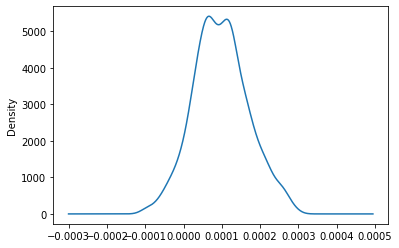

In [242]:
Kandy_df['copy HCHO values'].plot(kind='kde')

In [243]:
Kandy_df['Date']

0       2019-01-02
1       2019-01-03
2       2019-01-04
3       2019-01-05
4       2019-01-06
           ...    
1820    2023-12-27
1821    2023-12-28
1822    2023-12-29
1823    2023-12-30
1824    2023-12-31
Name: Date, Length: 1776, dtype: object

In [244]:
#setting index column
Kandy_df.index = pd.to_datetime(Kandy_df['Date'], format='%Y-%m-%d')
colombo_df.index = pd.to_datetime(colombo_df['Date'], format='%Y-%m-%d')
Deniyaya_df.index = pd.to_datetime(Deniyaya_df['Date'], format='%Y-%m-%d')
Nuwara_Eliya_df.index = pd.to_datetime(Nuwara_Eliya_df['Date'], format='%Y-%m-%d')
Bibile_df.index = pd.to_datetime(Bibile_df['Date'], format='%Y-%m-%d')
Kurunegala_df.index = pd.to_datetime(Kurunegala_df['Date'], format='%Y-%m-%d')
Jaffna_df.index = pd.to_datetime(Jaffna_df['Date'], format='%Y-%m-%d')





In [245]:
del Kandy_df['Date']

In [246]:
Kandy_df

,HCHO Value,copy HCHO values
Date,,
2019-01-02,0.000092,0.000092
2019-01-03,0.000142,0.000142
2019-01-04,0.000191,0.000191
2019-01-05,0.000122,0.000122
2019-01-06,-0.000065,-0.000065
...,...,...
2023-12-27,0.000082,0.000082
2023-12-28,0.000073,0.000073
2023-12-29,0.000065,0.000065


In [247]:
Kandy_df['copy HCHO values'] = Kandy_df['copy HCHO values'].interpolate(method='spline', order=2)

<AxesSubplot:xlabel='Date'>

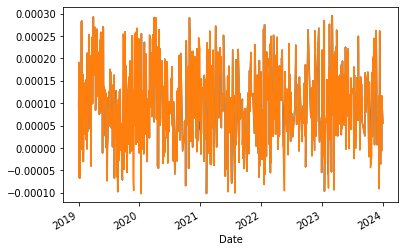

In [248]:
Kandy_df['copy HCHO values'].plot()
Kandy_df['HCHO Value'].plot()

<AxesSubplot:xlabel='Date'>

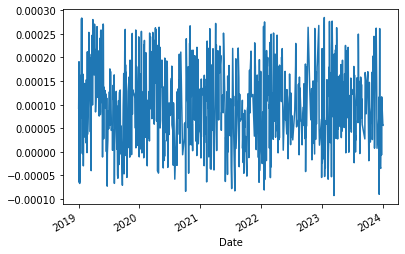

In [249]:
#remove outliers from copy HCHO values
Q1 = Kandy_df['copy HCHO values'].quantile(0.25)
Q3 = Kandy_df['copy HCHO values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Kandy_df = Kandy_df[(Kandy_df['copy HCHO values'] > lower_bound) & (Kandy_df['copy HCHO values'] < upper_bound)]

Kandy_df['copy HCHO values'].plot()


<AxesSubplot:xlabel='Date'>

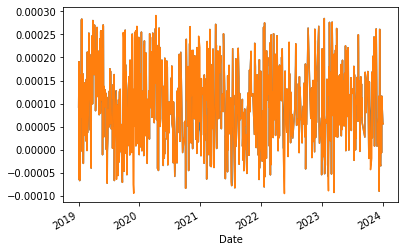

In [250]:
Kandy_df['copy HCHO values'].plot()
Kandy_df['HCHO Value'].plot()

In [251]:
adfuller_test(Kandy_df['copy HCHO values'].dropna())

ADF Test Statistic : -15.173814333265105
p-value : 6.3360417963860415e-28
#Lags Used : 2
Number of Observations Used : 1763
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

"\n#forecasting the future values\nimport statsmodels.api as sm\n\nmodel = sm.tsa.statespace.SARIMAX(Kandy_df['copy HCHO values'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))\nresults = model.fit()\nKandy_df['forecast'] = results.predict(start=1500, end=1824, dynamic=True)\nKandy_df[['copy HCHO values', 'forecast']].plot(figsize=(12, 8))\n"

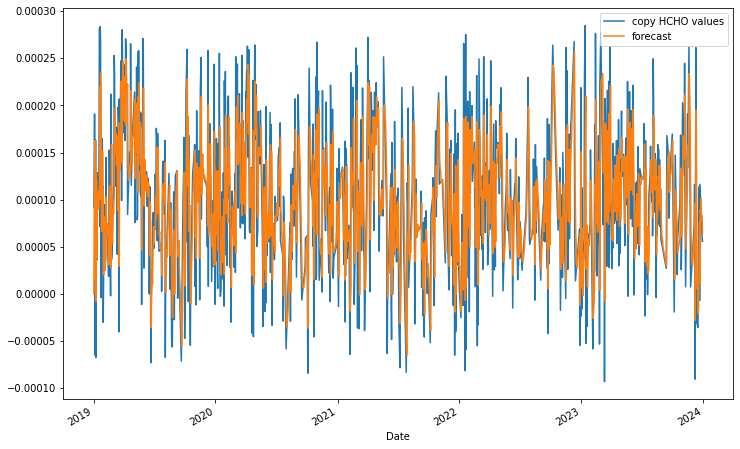

In [252]:
#arima model for copy HCHO values
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(Kandy_df['copy HCHO values'], order=(5,1,0))
model_fit = model.fit()
model_fit.summary()

Kandy_df['forecast'] = model_fit.get_prediction().predicted_mean
Kandy_df[['copy HCHO values','forecast']].plot(figsize=(12,8))
'''
#forecasting the future values
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(Kandy_df['copy HCHO values'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
Kandy_df['forecast'] = results.predict(start=1500, end=1824, dynamic=True)
Kandy_df[['copy HCHO values', 'forecast']].plot(figsize=(12, 8))
'''



In [253]:
Kandy_df['forecast']

Date
2019-01-02    0.000000
2019-01-03    0.000092
2019-01-04    0.000127
2019-01-05    0.000163
2019-01-06    0.000130
                ...   
2023-12-27    0.000088
2023-12-28    0.000078
2023-12-29    0.000083
2023-12-30    0.000074
2023-12-31    0.000065
Name: forecast, Length: 1766, dtype: float64

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

<AxesSubplot:xlabel='Date'>

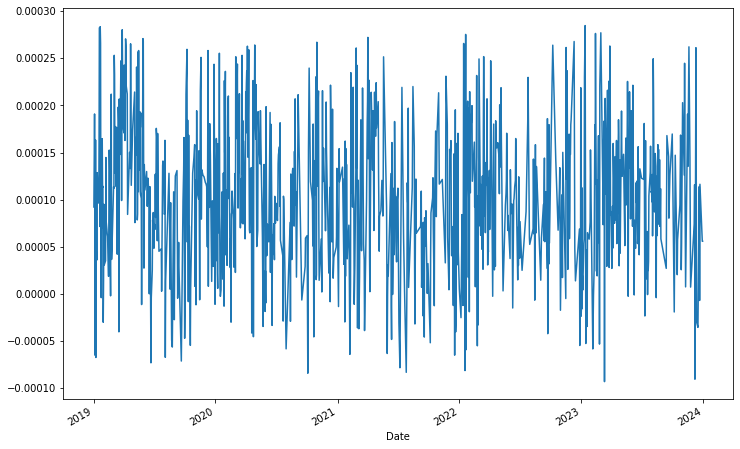

In [254]:
#forecasting the future values
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(Kandy_df['copy HCHO values'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
forecast = results.forecast(steps=365)
Kandy_df['copy HCHO values'].plot(figsize=(12, 8))

<AxesSubplot:>

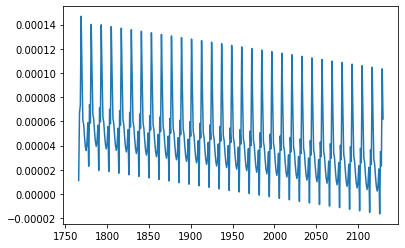

In [255]:
forecast.plot()


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

<AxesSubplot:xlabel='Date'>

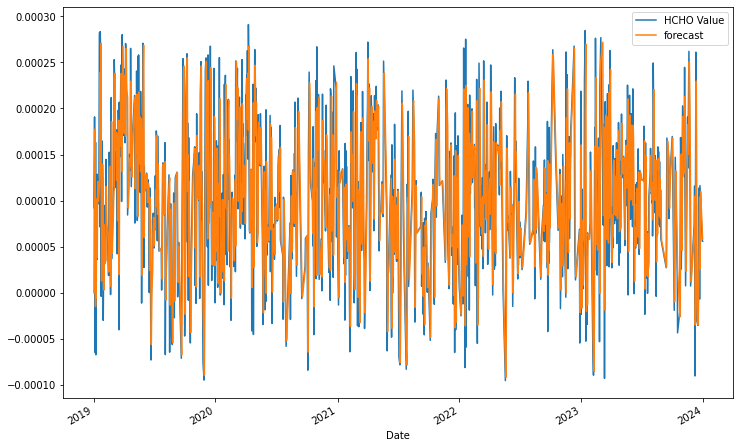

In [256]:
#ARMAX model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(Kandy_df['HCHO Value'], order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

Kandy_df['forecast'] = model_fit.get_prediction().predicted_mean
Kandy_df[['HCHO Value','forecast']].plot(figsize=(12,8))



<AxesSubplot:xlabel='Date'>

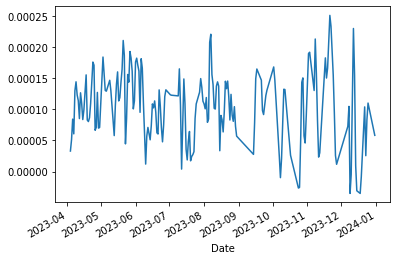

In [257]:
Kandy_df['forecast'][1500:1824].plot()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


<AxesSubplot:>

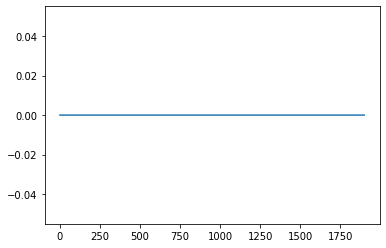

In [258]:
startdate = 0
enddate = 1900

tf = model_fit.predict(start=startdate, end=enddate, dynamic=True)
tf.plot()

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Import today's date from code
todays_date = datetime(2024, 1, 1)#datetime.today().date()

# Read the CSV file into a DataFrame

order = (1, 0, 1)

# Fit ARIMA model
model = ARIMA(Kandy_df['copy HCHO values'], order=order)
results = model.fit()

# Display the model summary
print(results.summary())

# Forecast for 7 days from today's date
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
predictions = []
# Print the predicted exchange rates for the next 7 days
print("Predicted Exchange Rates for the Next 7 Days:")
for i in range(forecast_steps):
   prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
   print(f"{prediction_date}: {forecast_values.iloc[i]}")
   predictions.append(forecast_values.iloc[i])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

                               SARIMAX Results                                
Dep. Variable:       copy HCHO values   No. Observations:                 1766
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14727.584
Date:                Wed, 17 Apr 2024   AIC                         -29447.168
Time:                        15:21:15   BIC                         -29425.262
Sample:                             0   HQIC                        -29439.074
                               - 1766                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.752e-05   3.57e-06     27.284      0.000    9.05e-05       0.000
ar.L1          0.6840   9.69e-11   7.06e+09      0.000       0.684       0.684
ma.L1         -0.1788   5.57e-11  -3.21e+09      0.0

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [260]:
forecast_values

1766    0.000072
1767    0.000080
1768    0.000086
1769    0.000089
1770    0.000092
1771    0.000094
1772    0.000095
1773    0.000096
1774    0.000096
1775    0.000097
1776    0.000097
1777    0.000097
1778    0.000097
1779    0.000097
1780    0.000097
1781    0.000097
1782    0.000097
1783    0.000097
1784    0.000097
1785    0.000098
1786    0.000098
1787    0.000098
1788    0.000098
1789    0.000098
1790    0.000098
1791    0.000098
1792    0.000098
1793    0.000098
1794    0.000098
1795    0.000098
Name: predicted_mean, dtype: float64

In [261]:
Kandy_df.tail()

,HCHO Value,copy HCHO values,forecast
Date,,,
2023-12-27,0.000082,0.000082,0.000093
2023-12-28,0.000073,0.000073,0.000084
2023-12-29,0.000065,0.000065,0.000075
2023-12-30,0.000056,0.000056,0.000067
2023-12-31,0.000056,0.000056,0.000058


<AxesSubplot:>

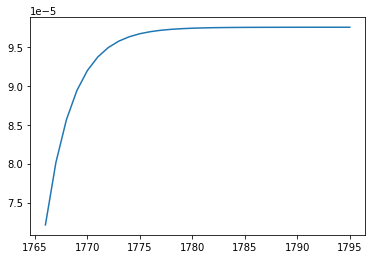

In [262]:
forecast_values.plot()


In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
vals = []
forecast_df = pd.DataFrame(columns=['Date', 'copy HCHO values'])


# Import today's date from code
todays_date = datetime(2024, 1, 1)#datetime.today().date()

# Read the CSV file into a DataFrame

order = (1, 1, 0)

# Fit ARIMA model
model = ARIMA(Kandy_df['copy HCHO values'], order=order)
results = model.fit()

# Display the model summary
print(results.summary())

# Forecast for 7 days from today's date
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
predictions = []
    # Print the predicted exchange rates for the next 7 days
print("Predicted Exchange Rates for the Next 30 Days:")
for i in range(forecast_steps):
    prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
    print(f"{prediction_date}: {forecast_values.iloc[i]}")
    predictions.append(forecast_values.iloc[i])
    Kandy_df.loc[-1 + 1, 'copy HCHO values'] = forecast_values.iloc[i]
    forecast_df = forecast_df.append({'Date': prediction_date, 'copy HCHO value': forecast_values.iloc[i]}, ignore_index=True)
    vals.append(forecast_values.iloc[i])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

                               SARIMAX Results                                
Dep. Variable:       copy HCHO values   No. Observations:                 1766
Model:                 ARIMA(1, 1, 0)   Log Likelihood               14568.697
Date:                Wed, 17 Apr 2024   AIC                         -29133.394
Time:                        15:21:16   BIC                         -29122.442
Sample:                             0   HQIC                        -29129.347
                               - 1766                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2879   1.21e-19  -2.38e+18      0.000      -0.288      -0.288
sigma2      3.964e-09   1.02e-10     38.903      0.000    3.76e-09    4.16e-09
Ljung-Box (L1) (Q):                   7.42   Jarque-

In [264]:
forecast_df.tail(30)

,Date,copy HCHO values,copy HCHO value
0,2024-01-02,NaN,0.000056
1,2024-01-03,NaN,0.000056
2,2024-01-04,NaN,0.000056
3,2024-01-05,NaN,0.000056
4,2024-01-06,NaN,0.000056
5,2024-01-07,NaN,0.000056
6,2024-01-08,NaN,0.000056
7,2024-01-09,NaN,0.000056
8,2024-01-10,NaN,0.000056
9,2024-01-11,NaN,0.000056


In [265]:
Kandy_df['copy HCHO values'].tail(30)

Date
2023-12-03 00:00:00    0.000056
2023-12-04 00:00:00    0.000062
2023-12-05 00:00:00    0.000068
2023-12-06 00:00:00    0.000074
2023-12-07 00:00:00    0.000116
2023-12-08 00:00:00   -0.000090
2023-12-09 00:00:00    0.000027
2023-12-10 00:00:00    0.000144
2023-12-11 00:00:00    0.000261
2023-12-12 00:00:00    0.000116
2023-12-13 00:00:00   -0.000030
2023-12-14 00:00:00   -0.000031
2023-12-15 00:00:00   -0.000033
2023-12-16 00:00:00   -0.000034
2023-12-17 00:00:00   -0.000035
2023-12-18 00:00:00    0.000002
2023-12-19 00:00:00    0.000039
2023-12-20 00:00:00    0.000077
2023-12-21 00:00:00    0.000114
2023-12-22 00:00:00   -0.000007
2023-12-23 00:00:00    0.000116
2023-12-24 00:00:00    0.000108
2023-12-25 00:00:00    0.000099
2023-12-26 00:00:00    0.000090
2023-12-27 00:00:00    0.000082
2023-12-28 00:00:00    0.000073
2023-12-29 00:00:00    0.000065
2023-12-30 00:00:00    0.000056
2023-12-31 00:00:00    0.000056
0                      0.000056
Name: copy HCHO values, dtype: floa

In [266]:
Kandy_df['copy HCHO values'].tail()

Date
2023-12-28 00:00:00    0.000073
2023-12-29 00:00:00    0.000065
2023-12-30 00:00:00    0.000056
2023-12-31 00:00:00    0.000056
0                      0.000056
Name: copy HCHO values, dtype: float64

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

# Create an empty DataFrame to store the forecasted values
forecast_df = pd.DataFrame(columns=['Date', 'copy HCHO values'])

# Import today's date
todays_date = datetime(2024, 1, 1)

# Define the order and seasonal_order for the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order with a yearly seasonality

# Fit SARIMA model
model = SARIMAX(Kandy_df['copy HCHO values'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Display the model summary
print(results.summary())

# Forecast for 30 days from today's date
forecast_steps = 30
forecast_values = results.forecast(steps=forecast_steps)

# Print the predicted values for the next 30 days and add them to the forecast DataFrame
for i in range(forecast_steps):
    prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
    print(f"{prediction_date}: {forecast_values.iloc[i]}")
    forecast_df = forecast_df.append({'Date': prediction_date, 'copy HCHO values': forecast_values.iloc[i]}, ignore_index=True)

# Display the forecast DataFrame
print(forecast_df)


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                   copy HCHO values   No. Observations:                 1767
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14351.121
Date:                            Wed, 17 Apr 2024   AIC                         -28692.243
Time:                                    15:21:18   BIC                         -28664.894
Sample:                                         0   HQIC                        -28682.134
                                           - 1767                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2811    3.4e-19   8.26e+17      0.000       0.281       0.281
ma.L1         -0.6462      4e-19  -

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


### using function get SARIMAX parameters

In [302]:
!pip install pmdarima

   ---------------------------------------- 613.6/613.6 kB 1.5 MB/s eta 0:00:00


In [304]:
# function to give the pdq values and seasonal pdq values

def get_pdq_values(df):
    from pmdarima import auto_arima
    stepwise_fit = auto_arima(df, start_p=0, start_q=0, max_p=4, max_q=4, m=12,
                              seasonal=True, trace=True, suppress_warnings=True, error_action="ignore", stepwise=True)
    return stepwise_fit.get_params()

get_pdq_values(Kandy_df['HCHO Value'].dropna())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-28571.183, Time=2.69 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-28642.951, Time=0.20 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-28762.976, Time=2.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-29122.187, Time=2.75 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-26829.339, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-29118.813, Time=0.84 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-29064.914, Time=3.69 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-29122.363, Time=6.11 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-29098.115, Time=8.53 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-28656.958, Time=4.20 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-29343.818, Time=6.32 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-29343.025, Time=3.29 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=-29322.827, Time=6.69 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-29247.694, Time=

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 0, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 2, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [307]:
get_pdq_values(Nuwara_Eliya_df['HCHO Value'].dropna())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-29133.973, Time=2.18 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-29254.779, Time=0.20 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-29688.956, Time=2.31 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-29941.699, Time=2.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-27685.680, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-29940.925, Time=0.33 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-29868.090, Time=3.15 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-29938.097, Time=2.52 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-29458.181, Time=2.08 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-29903.969, Time=9.27 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-29258.402, Time=1.75 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-30283.476, Time=1.69 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-30329.676, Time=1.08 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-29684.799, Time=

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 0, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [289]:
# Define the p, d, and q parameters to take any value between 0 and 2
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [300]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(Nuwara_Eliya_df['HCHO Value'],
                                              order=param,
                                              seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            results = model.fit()
            print(f'ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}')
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-27672.479561529017


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-27741.691381712986
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-27984.813418188503
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-28500.907261031756
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-28349.535182164174
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-28329.556301652865
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-28179.962422681914
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-28343.440743015562
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-28898.782576745565
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-28865.800277497347
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-28607.66614932455
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-29154.106416670096
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-29063.637709966024
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-29215.325643758133
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-28882.204383147186
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-29032.034309922812
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-29987.658109389915
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-29774.812283203184
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 -

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1791
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14259.792
Date:                            Wed, 17 Apr 2024   AIC                         -28509.584
Time:                                    15:40:24   BIC                         -28482.167
Sample:                                         0   HQIC                        -28499.457
                                           - 1791                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4427    5.8e-19   7.64e+17      0.000       0.443       0.443
ma.L1         -0.8579   8.65e-19  -

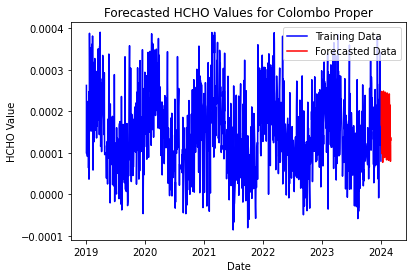

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1763
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14389.212
Date:                            Wed, 17 Apr 2024   AIC                         -28768.425
Time:                                    15:40:27   BIC                         -28741.088
Sample:                                         0   HQIC                        -28758.319
                                           - 1763                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4792   3.15e-19   1.52e+18      0.000       0.479       0.479
ma.L1         -0.7646   3.84e-19  -

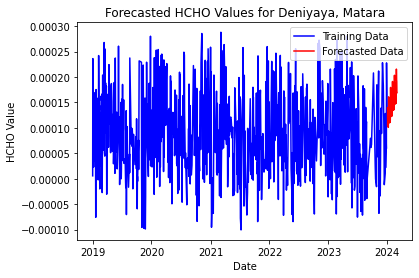

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1789
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14837.632
Date:                            Wed, 17 Apr 2024   AIC                         -29665.263
Time:                                    15:40:30   BIC                         -29637.853
Sample:                                         0   HQIC                        -29655.138
                                           - 1789                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6151   1.91e-19   3.21e+18      0.000       0.615       0.615
ma.L1         -0.8787    2.4e-19  -

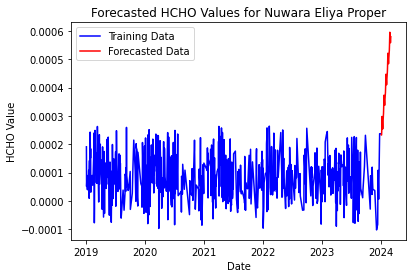

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1767
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14288.756
Date:                            Wed, 17 Apr 2024   AIC                         -28567.512
Time:                                    15:40:32   BIC                         -28540.164
Sample:                                         0   HQIC                        -28557.404
                                           - 1767                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3033   4.64e-19   6.53e+17      0.000       0.303       0.303
ma.L1         -0.6490   5.51e-19  -

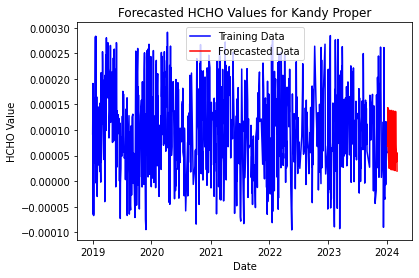

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1786
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14326.934
Date:                            Wed, 17 Apr 2024   AIC                         -28643.869
Time:                                    15:40:36   BIC                         -28616.467
Sample:                                         0   HQIC                        -28633.746
                                           - 1786                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2362   4.14e-19   5.71e+17      0.000       0.236       0.236
ma.L1         -0.6194   5.15e-19   

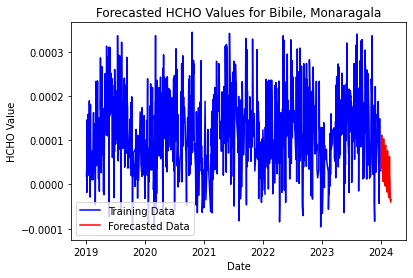

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1781
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14376.504
Date:                            Wed, 17 Apr 2024   AIC                         -28743.008
Time:                                    15:40:39   BIC                         -28715.620
Sample:                                         0   HQIC                        -28732.889
                                           - 1781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2804   3.94e-19   7.12e+17      0.000       0.280       0.280
ma.L1         -0.7367   5.96e-19  -

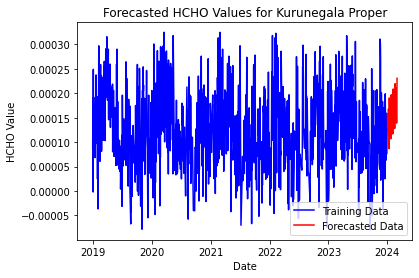

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1754
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14266.385
Date:                            Wed, 17 Apr 2024   AIC                         -28522.771
Time:                                    15:40:40   BIC                         -28495.460
Sample:                                         0   HQIC                        -28512.672
                                           - 1754                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2538   3.74e-19   6.79e+17      0.000       0.254       0.254
ma.L1         -0.7805   6.23e-19  -

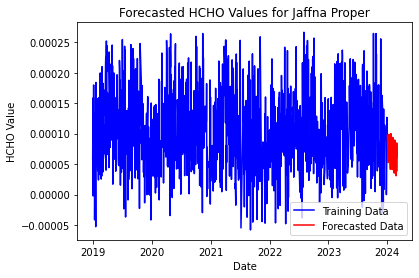

,Date,HCHO Value
0,2024-01-02,0.000097
1,2024-01-03,0.000083
2,2024-01-04,0.000080
3,2024-01-05,0.000078
4,2024-01-06,0.000052
5,2024-01-07,0.000055
6,2024-01-08,0.000063
7,2024-01-09,0.000092
8,2024-01-10,0.000088
9,2024-01-11,0.000099


In [299]:
def forecast_location(df, location):
    # Create an empty DataFrame to store the forecasted values
    forecast_df = pd.DataFrame(columns=['Date', 'HCHO Value'])

    # Import today's date
    todays_date = datetime(2024, 1, 1)

    # Define the order and seasonal_order for the SARIMA model
    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 12)  # Example seasonal order with a yearly seasonality

    # Fit SARIMA model
    model = SARIMAX(df['HCHO Value'], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Display the model summary
    print(results.summary())

    # Forecast for 30 days from today's date
    forecast_steps = 60
    forecast_values = results.forecast(steps=forecast_steps)

    # Print the predicted values for the next 30 days and add them to the forecast DataFrame
    for i in range(forecast_steps):
        prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
        print(f"{prediction_date}: {forecast_values.iloc[i]}")
        forecast_df = forecast_df.append({'Date': prediction_date, 'HCHO Value': forecast_values.iloc[i]}, ignore_index=True)

    # Display the forecast DataFrame
    print(forecast_df)

    # Plot the training and forecasted values on the same plot
    plt.plot(df.index, df['HCHO Value'], label='Training Data', color='blue')
    plt.plot(forecast_df['Date'], forecast_df['HCHO Value'], label='Forecasted Data', color='red')
    plt.title(f"Forecasted HCHO Values for {location}")
    plt.xlabel("Date")
    plt.ylabel("HCHO Value")
    plt.legend()
    plt.show()

    return forecast_df
forecast_location(colombo_df, 'Colombo Proper')
forecast_location(Deniyaya_df, 'Deniyaya, Matara')
forecast_location(Nuwara_Eliya_df, 'Nuwara Eliya Proper')
forecast_location(Kandy_df, 'Kandy Proper')
forecast_location(Bibile_df, 'Bibile, Monaragala')
forecast_location(Kurunegala_df, 'Kurunegala Proper')
forecast_location(Jaffna_df, 'Jaffna Proper')

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1791
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14259.792
Date:                            Wed, 17 Apr 2024   AIC                         -28509.584
Time:                                    15:21:39   BIC                         -28482.167
Sample:                                         0   HQIC                        -28499.457
                                           - 1791                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4427    5.8e-19   7.64e+17      0.000       0.443       0.443
ma.L1         -0.8579   8.65e-19  -

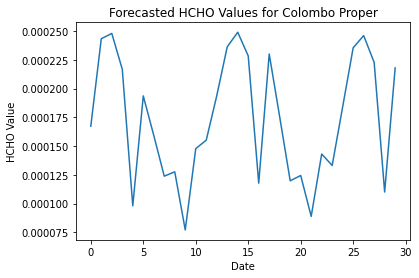

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1763
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14389.212
Date:                            Wed, 17 Apr 2024   AIC                         -28768.425
Time:                                    15:21:42   BIC                         -28741.088
Sample:                                         0   HQIC                        -28758.319
                                           - 1763                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4792   3.15e-19   1.52e+18      0.000       0.479       0.479
ma.L1         -0.7646   3.84e-19  -

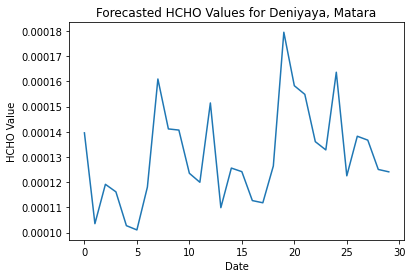

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1789
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14837.632
Date:                            Wed, 17 Apr 2024   AIC                         -29665.263
Time:                                    15:21:45   BIC                         -29637.853
Sample:                                         0   HQIC                        -29655.138
                                           - 1789                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6151   1.91e-19   3.21e+18      0.000       0.615       0.615
ma.L1         -0.8787    2.4e-19  -

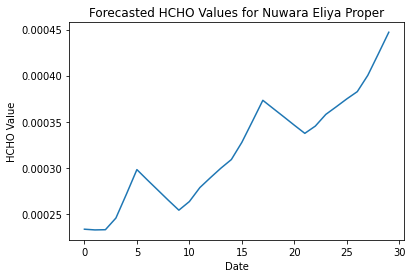

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1767
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14288.756
Date:                            Wed, 17 Apr 2024   AIC                         -28567.512
Time:                                    15:21:46   BIC                         -28540.164
Sample:                                         0   HQIC                        -28557.404
                                           - 1767                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3033   4.64e-19   6.53e+17      0.000       0.303       0.303
ma.L1         -0.6490   5.51e-19  -

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


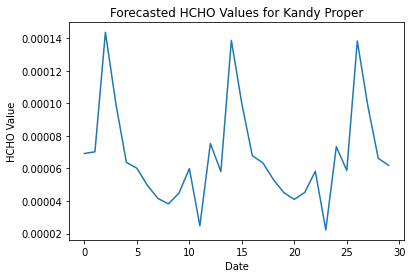

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1786
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14326.934
Date:                            Wed, 17 Apr 2024   AIC                         -28643.869
Time:                                    15:21:50   BIC                         -28616.467
Sample:                                         0   HQIC                        -28633.746
                                           - 1786                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2362   4.14e-19   5.71e+17      0.000       0.236       0.236
ma.L1         -0.6194   5.15e-19   

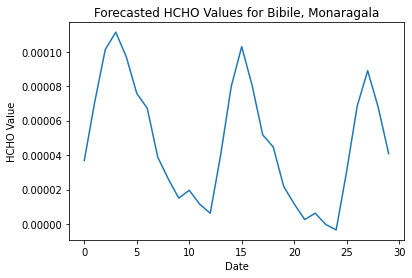

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1781
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14376.504
Date:                            Wed, 17 Apr 2024   AIC                         -28743.008
Time:                                    15:21:53   BIC                         -28715.620
Sample:                                         0   HQIC                        -28732.889
                                           - 1781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2804   3.94e-19   7.12e+17      0.000       0.280       0.280
ma.L1         -0.7367   5.96e-19  -

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


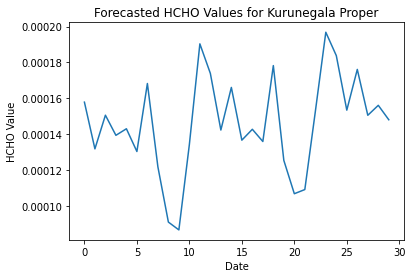

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


                                     SARIMAX Results                                      
Dep. Variable:                         HCHO Value   No. Observations:                 1754
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14266.385
Date:                            Wed, 17 Apr 2024   AIC                         -28522.771
Time:                                    15:21:54   BIC                         -28495.460
Sample:                                         0   HQIC                        -28512.672
                                           - 1754                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2538   3.74e-19   6.79e+17      0.000       0.254       0.254
ma.L1         -0.7805   6.23e-19  -

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


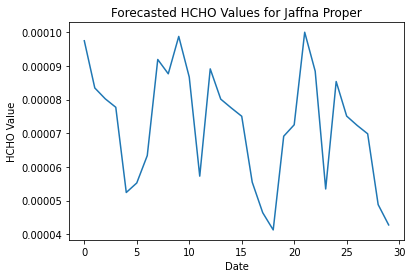

,Date,HCHO Value
0,2024-01-02,0.000097
1,2024-01-03,0.000083
2,2024-01-04,0.000080
3,2024-01-05,0.000078
4,2024-01-06,0.000052
5,2024-01-07,0.000055
6,2024-01-08,0.000063
7,2024-01-09,0.000092
8,2024-01-10,0.000088
9,2024-01-11,0.000099


In [269]:
#creating SARIMAX to forcast values upto 2024/01/31 for each location

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime


def forecast_location(df, location):
    # Create an empty DataFrame to store the forecasted values
    forecast_df = pd.DataFrame(columns=['Date', 'HCHO Value'])

    # Import today's date
    todays_date = datetime(2024, 1, 1)

    # Define the order and seasonal_order for the SARIMA model
    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 12)  # Example seasonal order with a yearly seasonality

    # Fit SARIMA model
    model = SARIMAX(df['HCHO Value'], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Display the model summary
    print(results.summary())

    # Forecast for 30 days from today's date
    forecast_steps = 30
    forecast_values = results.forecast(steps=forecast_steps)

    # Print the predicted values for the next 30 days and add them to the forecast DataFrame
    for i in range(forecast_steps):
        prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
        print(f"{prediction_date}: {forecast_values.iloc[i]}")
        forecast_df = forecast_df.append({'Date': prediction_date, 'HCHO Value': forecast_values.iloc[i]}, ignore_index=True)

    # Display the forecast DataFrame
    print(forecast_df)

    # Plot the forecasted values
    forecast_df['HCHO Value'].plot()
    plt.title(f"Forecasted HCHO Values for {location}")
    plt.xlabel("Date")
    plt.ylabel("HCHO Value")
    plt.show()

    

    return forecast_df

# Forecast HCHO values for each location
forecast_location(colombo_df, 'Colombo Proper')
forecast_location(Deniyaya_df, 'Deniyaya, Matara')
forecast_location(Nuwara_Eliya_df, 'Nuwara Eliya Proper')
forecast_location(Kandy_df, 'Kandy Proper')
forecast_location(Bibile_df, 'Bibile, Monaragala')
forecast_location(Kurunegala_df, 'Kurunegala Proper')
forecast_location(Jaffna_df, 'Jaffna Proper')




In [270]:
Kandy_df

,HCHO Value,copy HCHO values,forecast
Date,,,
2019-01-02 00:00:00,0.000092,0.000092,0.000000
2019-01-03 00:00:00,0.000142,0.000142,0.000092
2019-01-04 00:00:00,0.000191,0.000191,0.000128
2019-01-05 00:00:00,0.000122,0.000122,0.000178
2019-01-06 00:00:00,-0.000065,-0.000065,0.000140
...,...,...,...
2023-12-28 00:00:00,0.000073,0.000073,0.000084
2023-12-29 00:00:00,0.000065,0.000065,0.000075
2023-12-30 00:00:00,0.000056,0.000056,0.000067


In [271]:
#set Date as index for all dataframes
colombo_df.index = pd.to_datetime(colombo_df['Date'], format='%Y-%m-%d')
Deniyaya_df.index = pd.to_datetime(Deniyaya_df['Date'], format='%Y-%m-%d')
Nuwara_Eliya_df.index = pd.to_datetime(Nuwara_Eliya_df['Date'], format='%Y-%m-%d')
#Kandy_df.index = pd.to_datetime(Kandy_df['Date'], format='%Y-%m-%d')
Bibile_df.index = pd.to_datetime(Bibile_df['Date'], format='%Y-%m-%d')
Kurunegala_df.index = pd.to_datetime(Kurunegala_df['Date'], format='%Y-%m-%d')
Jaffna_df.index = pd.to_datetime(Jaffna_df['Date'], format='%Y-%m-%d')





                                        SARIMAX Results                                        
Dep. Variable:                              HCHO Value   No. Observations:                 1767
Model:             SARIMAX(1, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood               14592.145
Date:                                 Wed, 17 Apr 2024   AIC                         -29174.291
Time:                                         15:54:19   BIC                         -29146.906
Sample:                                              0   HQIC                        -29164.172
                                                - 1767                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9255   3.11e-19   2.97e+18      0.000       0.925       0

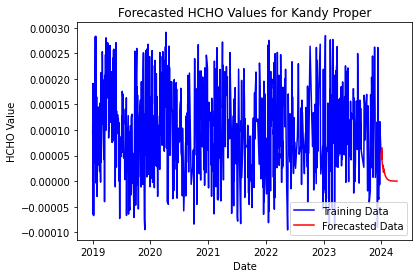

,Date,HCHO Value
0,2024-01-02,5.664589e-05
1,2024-01-03,4.241389e-05
2,2024-01-04,6.551695e-05
3,2024-01-05,5.303145e-05
4,2024-01-06,4.091843e-05
...,...,...
95,2024-04-06,4.719950e-08
96,2024-04-07,4.368278e-08
97,2024-04-08,4.042809e-08
98,2024-04-09,3.741590e-08


In [306]:
def forecast_location(df, location):
    # Create an empty DataFrame to store the forecasted values
    forecast_df = pd.DataFrame(columns=['Date', 'HCHO Value'])

    # Import today's date
    todays_date = datetime(2024, 1, 1)

    # Define the order and seasonal_order for the SARIMA model
    order = (1, 0, 1)
    seasonal_order = (0, 0, 2, 12)  # Example seasonal order with a yearly seasonality

    # Fit SARIMA model
    model = SARIMAX(df['HCHO Value'], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Display the model summary
    print(results.summary())

    # Forecast for 30 days from today's date
    forecast_steps = 100
    forecast_values = results.forecast(steps=forecast_steps)

    # Print the predicted values for the next 30 days and add them to the forecast DataFrame
    for i in range(forecast_steps):
        prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
        print(f"{prediction_date}: {forecast_values.iloc[i]}")
        forecast_df = forecast_df.append({'Date': prediction_date, 'HCHO Value': forecast_values.iloc[i]}, ignore_index=True)

    # Display the forecast DataFrame
    print(forecast_df)

    # Plot the training and forecasted values on the same plot
    plt.plot(df.index, df['HCHO Value'], label='Training Data', color='blue')
    plt.plot(forecast_df['Date'], forecast_df['HCHO Value'], label='Forecasted Data', color='red')
    plt.title(f"Forecasted HCHO Values for {location}")
    plt.xlabel("Date")
    plt.ylabel("HCHO Value")
    plt.legend()
    plt.show()

    return forecast_df
#(1,0,1)(0,0,2)[12]
forecast_location(Kandy_df, 'Kandy Proper')


2024-01-02 00:00:00: 0.00021676795647866172
2024-01-03 00:00:00: 0.00020229101123548333
2024-01-04 00:00:00: 0.0001890858710619839
2024-01-05 00:00:00: 0.00017872746631178627
2024-01-06 00:00:00: 0.0001682911092745071
2024-01-07 00:00:00: 0.000159500986536204
2024-01-08 00:00:00: 0.00014734976829959535
2024-01-09 00:00:00: 0.00013620051719835985
2024-01-10 00:00:00: 0.0001259292853584111
2024-01-11 00:00:00: 0.00011618861060293267
2024-01-12 00:00:00: 0.00010945772475861699
2024-01-13 00:00:00: 0.00010382806865658749
2024-01-14 00:00:00: 9.641047455070583e-05
2024-01-15 00:00:00: 9.016175250691422e-05
2024-01-16 00:00:00: 8.458392453099961e-05
2024-01-17 00:00:00: 7.987215954504449e-05
2024-01-18 00:00:00: 7.351319366036007e-05
2024-01-19 00:00:00: 6.747630386650049e-05
2024-01-20 00:00:00: 6.254655435951292e-05
2024-01-21 00:00:00: 5.802582640851268e-05
2024-01-22 00:00:00: 5.3868380066766294e-05
2024-01-23 00:00:00: 5.0169101945729595e-05
2024-01-24 00:00:00: 4.6449402870098523e-05
2

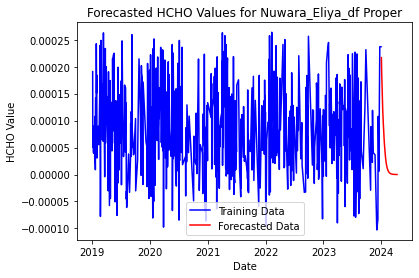

,Date,HCHO Value
0,2024-01-02,2.167680e-04
1,2024-01-03,2.022910e-04
2,2024-01-04,1.890859e-04
3,2024-01-05,1.787275e-04
4,2024-01-06,1.682911e-04
...,...,...
95,2024-04-06,5.745966e-08
96,2024-04-07,5.241369e-08
97,2024-04-08,4.781085e-08
98,2024-04-09,4.361222e-08


In [308]:
#(1,0,2)(0,0,0)[12]

def forecast_location(df, location):
    # Create an empty DataFrame to store the forecasted values
    forecast_df = pd.DataFrame(columns=['Date', 'HCHO Value'])

    # Import today's date
    todays_date = datetime(2024, 1, 1)

    # Define the order and seasonal_order for the SARIMA model
    order = (1, 0, 1)
    seasonal_order = (0, 0, 2, 12)  # Example seasonal order with a yearly seasonality

    # Fit SARIMA model
    model = SARIMAX(df['HCHO Value'], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Display the model summary
    #print(results.summary())

    # Forecast for 30 days from today's date
    forecast_steps = 100
    forecast_values = results.forecast(steps=forecast_steps)

    # Print the predicted values for the next 30 days and add them to the forecast DataFrame
    for i in range(forecast_steps):
        prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
        print(f"{prediction_date}: {forecast_values.iloc[i]}")
        forecast_df = forecast_df.append({'Date': prediction_date, 'HCHO Value': forecast_values.iloc[i]}, ignore_index=True)

    # Display the forecast DataFrame
    #print(forecast_df)

    # Plot the training and forecasted values on the same plot
    plt.plot(df.index, df['HCHO Value'], label='Training Data', color='blue')
    plt.plot(forecast_df['Date'], forecast_df['HCHO Value'], label='Forecasted Data', color='red')
    plt.title(f"Forecasted HCHO Values for {location}")
    plt.xlabel("Date")
    plt.ylabel("HCHO Value")
    plt.legend()
    plt.show()

    return forecast_df
#(1,0,1)(0,0,2)[12]
forecast_location(Nuwara_Eliya_df, 'Nuwara_Eliya_df Proper')